In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [42]:
#df is the x and y data combined
df = pd.read_csv('data.txt',sep=" ", header = None)
df.columns = ['Entry','BET','V_meso','V_mic','Temp', 'P','uptake']
dt=df.drop(columns=['Entry'])
#x_2 and y_2 are features and uptakes respectively
x_2=dt.drop(columns=['uptake'])
y_2=df.iloc[:,6:7]
df.head()
dt
x_2.shape

x_2['Temp'].unique()
#x_2['P'].hist()

array([ 25,   0,  50, 120], dtype=int64)

In [5]:
corr = dt.corr()
#corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,BET,V_meso,V_mic,Temp,P,uptake
BET,1,0.3,0.67,0.14,-0.072,0.24
V_meso,0.3,1,-0.32,0.15,-0.015,-0.0079
V_mic,0.67,-0.32,1,0.048,-0.043,0.2
Temp,0.14,0.15,0.048,1,-0.16,-0.28
P,-0.072,-0.015,-0.043,-0.16,1,0.73
uptake,0.24,-0.0079,0.2,-0.28,0.73,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C621C2A20>]],
      dtype=object)

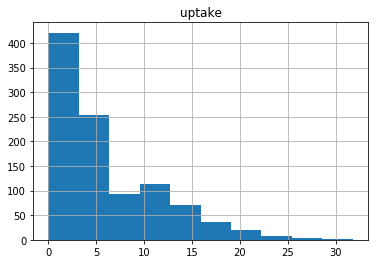

In [18]:
#sns.pairplot(dt)
y_2.hist()

(3.121267326430429, 0.5910794327293917)

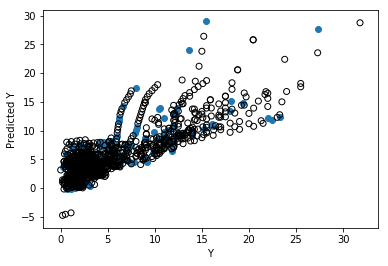

In [27]:
#linear regression with test/train split 
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2, random_state=101)
lm=LinearRegression()
lm.fit(X_train,y_train)
#np.concatenate((lm.coef_,lm.intercept_), axis=None)
#lm.score(X_train,y_train)
pred = lm.predict(X_test)
plt.scatter(y_test,pred)
plt.scatter(y_train,lm.predict(X_train),facecolors='none',edgecolors='k')
plt.xlabel('Y')
plt.ylabel('Predicted Y')
from sklearn.metrics import mean_squared_error, r2_score
lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse,r2_score(y_test,pred)

In [8]:
#K-fold cross validation error
arr=np.array([])
for i in range(5,500,10):
    results = model_selection.cross_val_score(lm, x_2, y_2, scoring="neg_mean_squared_error", cv=i)
    res=np.array([np.sqrt(abs(results.mean())),results.std(),i])
    arr=np.append(arr, res)
    #print(a)
    

array([[  3.53138744,   5.77596839,   5.        ],
       [  3.35801109,   7.1414551 ,  15.        ],
       [  3.32520454,   7.42835166,  25.        ],
       [  3.31768647,   8.00166187,  35.        ],
       [  3.34015207,  10.07283277,  45.        ],
       [  3.28865091,  10.15068721,  55.        ],
       [  3.24985313,  10.51162655,  65.        ],
       [  3.2730662 ,  11.31867858,  75.        ],
       [  3.24230752,  11.29669937,  85.        ],
       [  3.24910805,  12.49456316,  95.        ],
       [  3.23985043,  12.71789228, 105.        ],
       [  3.22976108,  12.50196373, 115.        ],
       [  3.20948755,  12.60232865, 125.        ],
       [  3.2178204 ,  13.87040487, 135.        ],
       [  3.21946242,  13.45416657, 145.        ],
       [  3.22315177,  14.74428283, 155.        ],
       [  3.18776305,  14.61512367, 165.        ],
       [  3.20391023,  14.30189606, 175.        ],
       [  3.19534562,  14.07884647, 185.        ],
       [  3.16739118,  13.79568

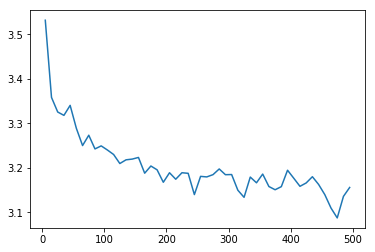

In [9]:
cverror=np.reshape(arr,(-1,3))
plt.plot(cverror[:,2],cverror[:,0])
#plt.fill_between(cverror[:,2],cverror[:,0]+cverror[:,1],cverror[:,0]-cverror[:,1],color='gray',alpha=0.2)
cverror

In [21]:
#For data with P and Temp requirements
#added terms
af = dt#.loc[(df.Temp == 25)&(df.P == 1)]
af["BET^2"]=af["BET"]**2
af["V_meso^2"]=af["V_meso"]**2
af["V_mic^2"]=af["V_mic"]**2
#af["BET^3"]=af["BET"]**3
#af["V_meso^3"]=af["V_meso"]**3
#af["V_mic^3"]=af["V_mic"]**3
#af["BET^4"]=af["BET"]**4
#af["V_meso^4"]=af["V_meso"]**4
#af["V_mic^4"]=af["V_mic"]**4
af["V_mic*V_meso"]=af["V_mic"]*af["V_meso"]
af["V_mic/V_tot"]=af["V_mic"]/(af["V_mic"]+af["V_meso"])
#af["BET/V_tot"]=af["BET"]/(af["V_mic"]+af["V_meso"])
#af["BET*V_tot"]=af["BET"]*(af["V_mic"]+af["V_meso"])
#af["V_mic*V_meso^2"]=(af["V_mic"]*af["V_meso"])**2
af["(V_mic/V_tot)^2"]=(af["V_mic"]/(af["V_mic"]+af["V_meso"]))**2
data=af.drop(columns=['Temp', 'P'])
x=data.drop(columns=['uptake'])
y=af.iloc[:,5:6]
x.head()

,BET,V_meso,V_mic,BET^2,V_meso^2,V_mic^2,V_mic*V_meso,V_mic/V_tot^2,V_mic/V_tot,(V_mic/V_tot)^2
0,798,0.18,0.42,636804,0.0324,0.1764,0.0756,0.490000,0.700000,0.490000
1,241,1.01,0.09,58081,1.0201,0.0081,0.0909,0.006694,0.081818,0.006694
2,448,1.09,0.21,200704,1.1881,0.0441,0.2289,0.026095,0.161538,0.026095
3,826,0.91,0.39,682276,0.8281,0.1521,0.3549,0.090000,0.300000,0.090000
4,895,0.90,0.40,801025,0.8100,0.1600,0.3600,0.094675,0.307692,0.094675


the training error is (rmse, r2) (5.089903414802136, 0.15646613056685754)
the testing error is (rmse, r2) (4.621477746782367, 0.10352381989111203)
k-fold cross validation error is (rmse) 5.605067238868744


6.280042087907429

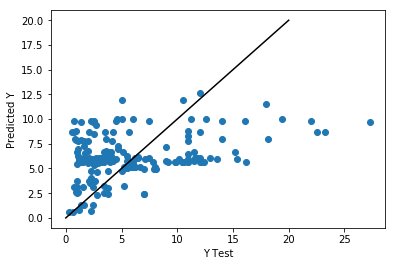

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
linr=LinearRegression()
linr.fit(X_train,y_train)
pred = linr.predict(X_test)
plt.scatter(y_test,pred)
plt.plot([0, 20], [0, 20], '-k')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse,r2_score(y_test,pred)

a= np.sqrt(mean_squared_error(y_train,linr.predict(X_train))),r2_score(y_train,linr.predict(X_train))
b= np.sqrt(mean_squared_error(y_test,linr.predict(X_test))),r2_score(y_test,linr.predict(X_test))
c=model_selection.cross_val_score(linr, x, y, scoring='neg_mean_squared_error', cv=5)
print("the training error is (rmse, r2)", a)
print("the testing error is (rmse, r2)", b)
print("k-fold cross validation error is (rmse)", np.sqrt(abs(c.mean())))
#linr.coef_
#np.sqrt(abs(c))
c.std()


In [28]:

#Feature scaling the training data 
#Using MLP neural nets
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_

x_trainscale=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

#print(scaler.mean_)
#print(scaler.transform(data))
#print(scaler.transform([[2, 2]]))
x_testscale=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [30]:
x_trainscale

,BET,V_meso,V_mic,Temp,P
0,0.721971,-0.036974,0.689817,0.317216,-0.664580
1,-1.425479,-0.346797,-1.076633,-1.182484,0.485373
2,0.882207,1.458742,-0.300131,1.816916,-0.419084
3,-0.524151,-0.437748,-0.064605,0.317216,-0.574134
4,-0.386806,-0.400781,0.358607,0.317216,-0.031460
5,-0.316703,-0.416624,-0.049884,0.317216,0.485373
6,1.294242,-0.211249,1.617203,0.317216,-0.599976
7,-1.252367,-0.054577,-1.775853,-1.182484,-0.548293
8,-0.837470,-0.418384,-0.193408,1.816916,-0.548293
9,-0.737322,-0.347970,-0.230209,0.317216,-0.599976


In [34]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(50,50),max_iter=1000, random_state=1, solver='lbfgs' )
nn.fit(x_trainscale,y_train['uptake'].ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

the training error is (rmse, r2) 0.23754709180603342
the testing error is (rmse, r2) 0.4197898677431781


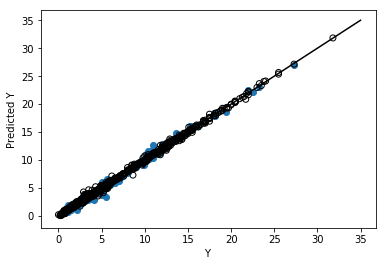

In [35]:
predy=nn.predict(x_testscale)
#plt.scatter(y_test,predy)
plt.scatter(y_test,predy)
plt.scatter(y_train,nn.predict(x_trainscale),facecolors='none',edgecolors='k')
plt.plot([0, 35], [0, 35], '-k')
plt.xlabel('Y ')
plt.ylabel('Predicted Y')
a= np.sqrt(mean_squared_error(y_train,nn.predict(x_trainscale)))
b= np.sqrt(mean_squared_error(y_test,predy))
#c=model_selection.cross_val_score(linr, x, y, scoring='neg_mean_squared_error', cv=5)
print("the training error is (rmse, r2)", a)
print("the testing error is (rmse, r2)", b)
#print("k-fold cross validation error is (rmse)", np.sqrt(abs(c.mean())))

In [16]:
scaler.fit(X_train)
x_trainscale=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

#print(scaler.mean_)
#print(scaler.transform(data))
#print(scaler.transform([[2, 2]]))
x_testscale=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
